In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy  as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


2022-03-10 10:39:06.378932: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-10 10:39:06.378988: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Data Analysis and Visualization

In [2]:
# load the data
spam_data = pd.read_csv("../data/spambase.csv",  sep = ',', header= None )
print(spam_data.head())

     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


The colunmn names are integers so renaming the columns appropriately (column names are available at the UCI website here: https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names)

In [3]:

# renaming the columns
spam_data.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]
print(spam_data.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

/home/sajid/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


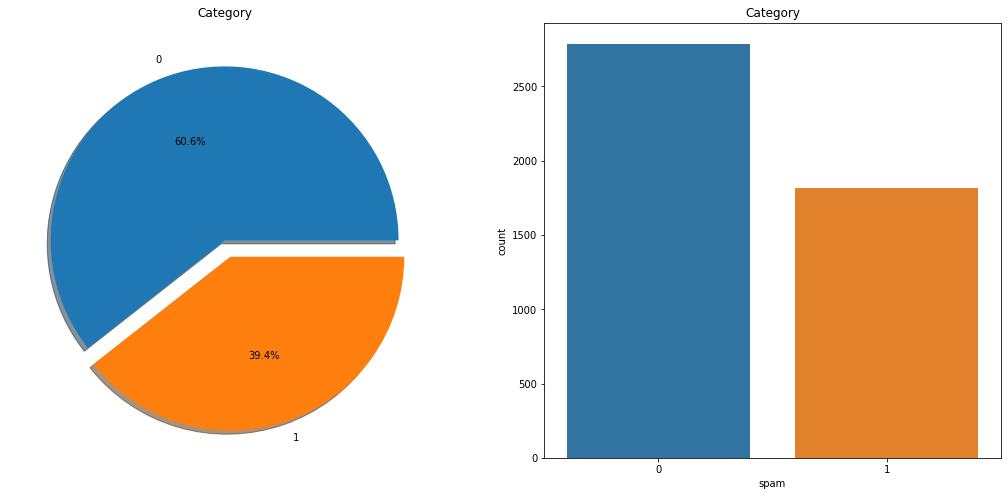

In [4]:
#To show the distribution of spam data
f,ax=plt.subplots(1,2,figsize=(18,8))
spam_data['spam'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Category')
ax[0].set_ylabel('')
sns.countplot('spam',data=spam_data,ax=ax[1])
ax[1].set_title('Category')
plt.show()

/home/sajid/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='spam', ylabel='count'>

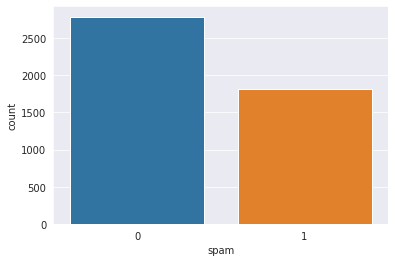

In [5]:
sns.set_style("darkgrid")
sns.countplot(spam_data.spam)


In [6]:
# look at dimensions of the df
print(spam_data.shape)

(4601, 58)


In [7]:
# check missing values in the dataset 
spam_data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

## Data Preparation
Let's now conduct some prelimininary data preparation steps, i.e. rescaling the variables.Rescaling is required as some columns like e.g at the end (capital_run_length_longest, capital_run_length_total etc.) have much higher values (means = 52, 283 etc.) than most other columns which represent fraction of word occurrences (no. of times word appears in email/total no. of words in email)

In [8]:
spam_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [9]:
# splitting into X and y in order to seperate labels from features
X = spam_data.drop("spam", axis = 1)
y = spam_data.spam.values.astype(int)

In [10]:
# scaling the features
# note that the scale function standardises each column, i.e.
# x = x-mean(x)/std(x)

from sklearn.preprocessing import scale
X = scale(X)

In [11]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [12]:
# confirm that splitting also has similar distribution of spam and ham 
# emails
print(y_train.mean())
print(y_test.mean())

0.3978260869565217
0.38522809558291093


# Classification


# Part 1

In [13]:
#Defining the model architecture
#A dropout layer is inserted  as a form of regularization 
#which will help reduce overfitting by randomly setting (here 30%) of the input unit values to zero.
model = keras.Sequential(
    [
        keras.layers.Dense(units=9, activation="relu", input_shape=(X_train.shape[-1],) ),
        # randomly delete 30% of the input units below
        keras.layers.Dropout(0.3),
        keras.layers.Dense(units=9, activation="relu"),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights = model.get_weights()

2022-03-10 10:39:11.551599: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-10 10:39:11.551635: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-10 10:39:11.551663: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sajid): /proc/driver/nvidia/version does not exist
2022-03-10 10:39:11.551977: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 522       
                                                                 
 dropout (Dropout)           (None, 9)                 0         
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 622
Trainable params: 622
Non-trainable params: 0
_________________________________________________________________


In [15]:
import visualkeras

In [16]:
from PIL import ImageFont

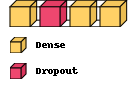

In [17]:
visualkeras.layered_view(model, legend=True)  # font is optional!

In [18]:
learning_rate = 0.001

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
              loss="binary_crossentropy", 
              metrics=keras.metrics.AUC()
             )

In [19]:
history = model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=1000, 
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/4 [======>.......................] - ETA: 2s - loss: 0.9621 - auc: 0.4208WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f045d9e3950> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach

4/4 [==============================] - 0s 11ms/step - loss: 0.3358 - auc: 0.9337 - val_loss: 0.3160 - val_auc: 0.9408
Epoch 50/500
4/4 [==============================] - 0s 13ms/step - loss: 0.3313 - auc: 0.9360 - val_loss: 0.3124 - val_auc: 0.9418
Epoch 51/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3278 - auc: 0.9373 - val_loss: 0.3088 - val_auc: 0.9427
Epoch 52/500
4/4 [==============================] - 0s 12ms/step - loss: 0.3149 - auc: 0.9428 - val_loss: 0.3055 - val_auc: 0.9436
Epoch 53/500
4/4 [==============================] - 0s 13ms/step - loss: 0.3171 - auc: 0.9403 - val_loss: 0.3024 - val_auc: 0.9445
Epoch 54/500
4/4 [==============================] - 0s 15ms/step - loss: 0.3089 - auc: 0.9439 - val_loss: 0.2995 - val_auc: 0.9454
Epoch 55/500
4/4 [==============================] - 0s 12ms/step - loss: 0.3168 - auc: 0.9411 - val_loss: 0.2967 - val_auc: 0.9460
Epoch 56/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3091 - auc: 0.9432 - 

4/4 [==============================] - 0s 10ms/step - loss: 0.2325 - auc: 0.9658 - val_loss: 0.2420 - val_auc: 0.9639
Epoch 112/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2244 - auc: 0.9685 - val_loss: 0.2417 - val_auc: 0.9639
Epoch 113/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2340 - auc: 0.9651 - val_loss: 0.2413 - val_auc: 0.9642
Epoch 114/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2226 - auc: 0.9682 - val_loss: 0.2411 - val_auc: 0.9643
Epoch 115/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2263 - auc: 0.9677 - val_loss: 0.2408 - val_auc: 0.9644
Epoch 116/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2321 - auc: 0.9659 - val_loss: 0.2404 - val_auc: 0.9644
Epoch 117/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2242 - auc: 0.9680 - val_loss: 0.2400 - val_auc: 0.9645
Epoch 118/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2241 - auc: 0.

4/4 [==============================] - 0s 11ms/step - loss: 0.2000 - auc: 0.9736 - val_loss: 0.2269 - val_auc: 0.9694
Epoch 174/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1969 - auc: 0.9754 - val_loss: 0.2268 - val_auc: 0.9694
Epoch 175/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1960 - auc: 0.9754 - val_loss: 0.2267 - val_auc: 0.9695
Epoch 176/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1906 - auc: 0.9762 - val_loss: 0.2266 - val_auc: 0.9694
Epoch 177/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2003 - auc: 0.9747 - val_loss: 0.2266 - val_auc: 0.9694
Epoch 178/500
4/4 [==============================] - 0s 12ms/step - loss: 0.1960 - auc: 0.9754 - val_loss: 0.2265 - val_auc: 0.9695
Epoch 179/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2028 - auc: 0.9744 - val_loss: 0.2264 - val_auc: 0.9695
Epoch 180/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2076 - auc: 0.

4/4 [==============================] - 0s 10ms/step - loss: 0.1765 - auc: 0.9805 - val_loss: 0.2202 - val_auc: 0.9721
Epoch 236/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1822 - auc: 0.9791 - val_loss: 0.2203 - val_auc: 0.9722
Epoch 237/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1866 - auc: 0.9778 - val_loss: 0.2203 - val_auc: 0.9722
Epoch 238/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1794 - auc: 0.9787 - val_loss: 0.2200 - val_auc: 0.9722
Epoch 239/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1845 - auc: 0.9782 - val_loss: 0.2198 - val_auc: 0.9722
Epoch 240/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1874 - auc: 0.9773 - val_loss: 0.2196 - val_auc: 0.9722
Epoch 241/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1876 - auc: 0.9774 - val_loss: 0.2196 - val_auc: 0.9722
Epoch 242/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1795 - auc: 0.979

4/4 [==============================] - 0s 12ms/step - loss: 0.1775 - auc: 0.9798 - val_loss: 0.2145 - val_auc: 0.9738
Epoch 298/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1723 - auc: 0.9806 - val_loss: 0.2146 - val_auc: 0.9738
Epoch 299/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1728 - auc: 0.9812 - val_loss: 0.2145 - val_auc: 0.9737
Epoch 300/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1772 - auc: 0.9800 - val_loss: 0.2144 - val_auc: 0.9738
Epoch 301/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1771 - auc: 0.9802 - val_loss: 0.2142 - val_auc: 0.9738
Epoch 302/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1721 - auc: 0.9811 - val_loss: 0.2142 - val_auc: 0.9739
Epoch 303/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1778 - auc: 0.9793 - val_loss: 0.2141 - val_auc: 0.9739
Epoch 304/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1769 - auc: 0.97

4/4 [==============================] - 0s 10ms/step - loss: 0.1633 - auc: 0.9826 - val_loss: 0.2100 - val_auc: 0.9742
Epoch 360/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1632 - auc: 0.9831 - val_loss: 0.2100 - val_auc: 0.9743
Epoch 361/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1608 - auc: 0.9829 - val_loss: 0.2101 - val_auc: 0.9743
Epoch 362/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1653 - auc: 0.9821 - val_loss: 0.2102 - val_auc: 0.9743
Epoch 363/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1633 - auc: 0.9824 - val_loss: 0.2102 - val_auc: 0.9744
Epoch 364/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1626 - auc: 0.9825 - val_loss: 0.2102 - val_auc: 0.9744
Epoch 365/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1675 - auc: 0.9822 - val_loss: 0.2103 - val_auc: 0.9744
Epoch 366/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1650 - auc: 0.9

4/4 [==============================] - 0s 10ms/step - loss: 0.1582 - auc: 0.9840 - val_loss: 0.2040 - val_auc: 0.9749
Epoch 422/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1548 - auc: 0.9842 - val_loss: 0.2041 - val_auc: 0.9749
Epoch 423/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1586 - auc: 0.9836 - val_loss: 0.2041 - val_auc: 0.9748
Epoch 424/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1573 - auc: 0.9840 - val_loss: 0.2041 - val_auc: 0.9748
Epoch 425/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1592 - auc: 0.9836 - val_loss: 0.2040 - val_auc: 0.9747
Epoch 426/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1536 - auc: 0.9846 - val_loss: 0.2041 - val_auc: 0.9748
Epoch 427/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1578 - auc: 0.9837 - val_loss: 0.2040 - val_auc: 0.9747
Epoch 428/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1598 - auc: 0.983

4/4 [==============================] - 0s 9ms/step - loss: 0.1478 - auc: 0.9860 - val_loss: 0.2020 - val_auc: 0.9750
Epoch 484/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1443 - auc: 0.9861 - val_loss: 0.2021 - val_auc: 0.9750
Epoch 485/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1538 - auc: 0.9845 - val_loss: 0.2020 - val_auc: 0.9749
Epoch 486/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1526 - auc: 0.9849 - val_loss: 0.2018 - val_auc: 0.9749
Epoch 487/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1566 - auc: 0.9841 - val_loss: 0.2018 - val_auc: 0.9750
Epoch 488/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1572 - auc: 0.9835 - val_loss: 0.2017 - val_auc: 0.9749
Epoch 489/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1478 - auc: 0.9855 - val_loss: 0.2013 - val_auc: 0.9751
Epoch 490/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1516 - auc: 0.98

# Part 2
Finding the co relation between features and with y label 

In [20]:
# Finding the co relation between each feature and label
# As the features are numerical and label is categorical so kendall is used to measure cor relation 
X = spam_data.drop("spam", axis = 1)
corr_action=X.corrwith(spam_data['spam'],method='kendall').abs()
print(corr_action)

word_freq_make                0.227362
word_freq_address             0.283375
word_freq_all                 0.300356
word_freq_3d                  0.090552
word_freq_our                 0.371915
word_freq_over                0.301855
word_freq_remove              0.496535
word_freq_internet            0.328766
word_freq_order               0.288399
word_freq_mail                0.276449
word_freq_receive             0.341674
word_freq_will                0.130913
word_freq_people              0.203286
word_freq_report              0.146933
word_freq_addresses           0.260423
word_freq_free                0.471148
word_freq_business            0.334895
word_freq_email               0.282620
word_freq_you                 0.305032
word_freq_credit              0.316879
word_freq_your                0.439906
word_freq_font                0.137109
word_freq_000                 0.410411
word_freq_money               0.453766
word_freq_hp                  0.376617
word_freq_hpl            

In [21]:
corr_action.sort_values(ascending=False).head(10)

char_freq_!                   0.528564
char_freq_$                   0.523779
word_freq_remove              0.496535
word_freq_free                0.471148
word_freq_money               0.453766
word_freq_your                0.439906
capital_run_length_longest    0.425838
word_freq_000                 0.410411
capital_run_length_average    0.399748
word_freq_hp                  0.376617
dtype: float64

In [22]:
# Selecting those features whose co relation with dependent variable (y)
relevant_num_features = corr_action[corr_action>0.3]

In [23]:
relevant_num_features_col=relevant_num_features.index

In [24]:
selected_num_df = X[relevant_num_features_col]  # Only getting columns having corr> 0.3 wrt output

In [25]:
selected_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_all               4601 non-null   float64
 1   word_freq_our               4601 non-null   float64
 2   word_freq_over              4601 non-null   float64
 3   word_freq_remove            4601 non-null   float64
 4   word_freq_internet          4601 non-null   float64
 5   word_freq_receive           4601 non-null   float64
 6   word_freq_free              4601 non-null   float64
 7   word_freq_business          4601 non-null   float64
 8   word_freq_you               4601 non-null   float64
 9   word_freq_credit            4601 non-null   float64
 10  word_freq_your              4601 non-null   float64
 11  word_freq_000               4601 non-null   float64
 12  word_freq_money             4601 non-null   float64
 13  word_freq_hp                4601 

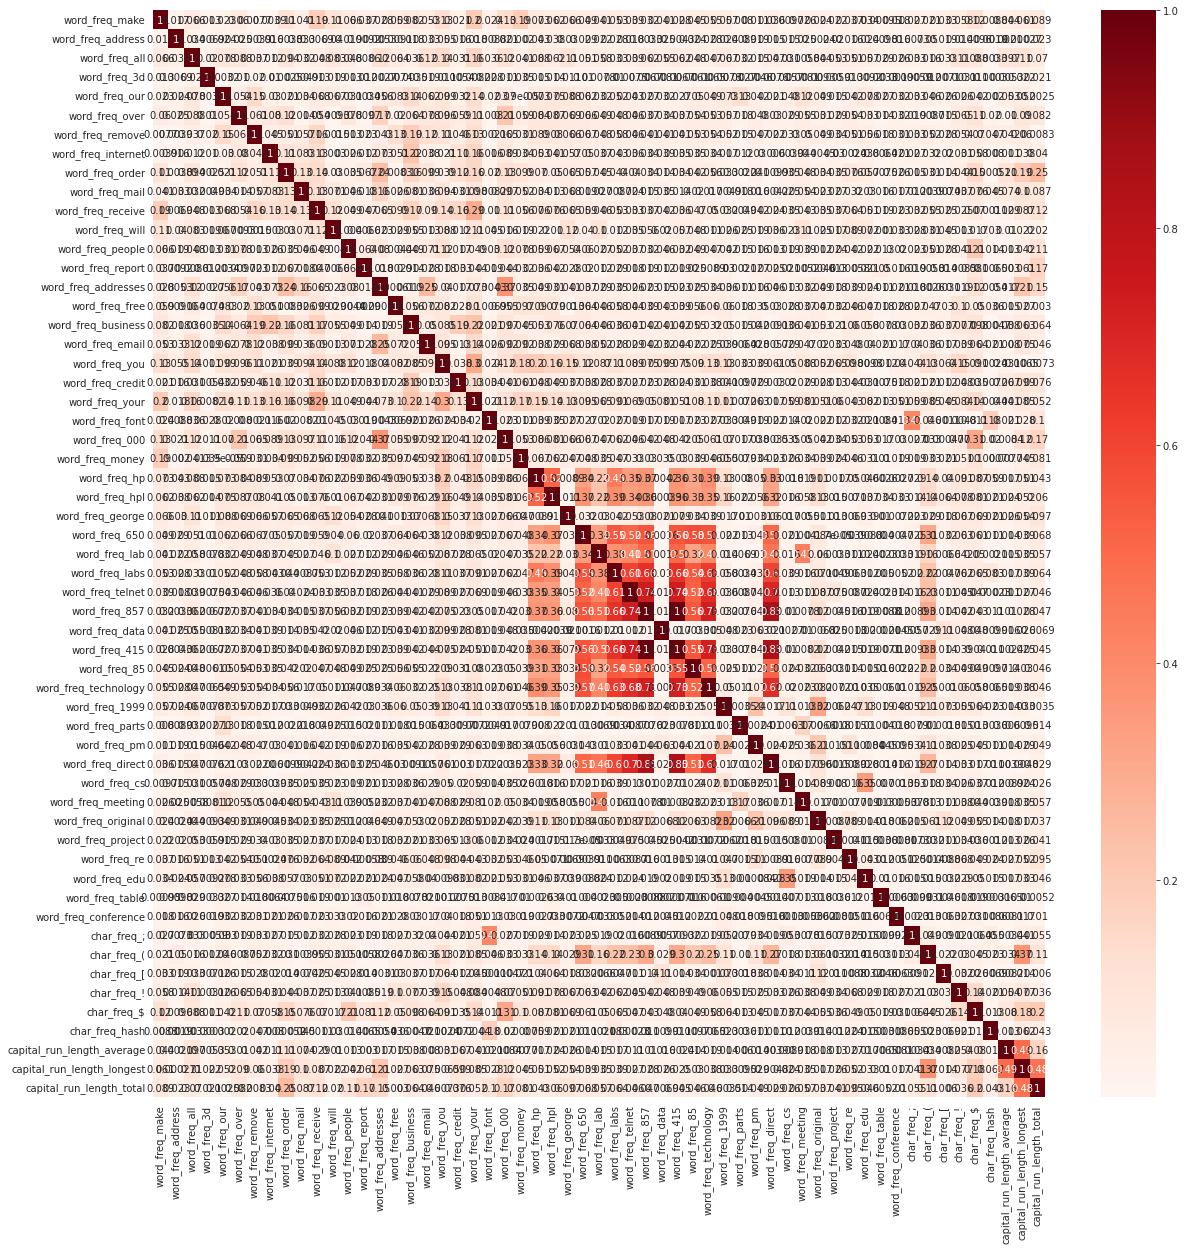

In [26]:
# To fing co relation between features
pearson_corr = X.corr(method='pearson').abs()
#Using Pearson Correlation
plt.figure(figsize=(20,20))
# cor = df.corr()
sns.heatmap(pearson_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [27]:
cor_matrix = X.corr().abs()
print(cor_matrix)

                            word_freq_make  word_freq_address  word_freq_all  \
word_freq_make                    1.000000           0.016759       0.065627   
word_freq_address                 0.016759           1.000000       0.033526   
word_freq_all                     0.065627           0.033526       1.000000   
word_freq_3d                      0.013273           0.006923       0.020246   
word_freq_our                     0.023119           0.023760       0.077734   
word_freq_over                    0.059674           0.024840       0.087564   
word_freq_remove                  0.007669           0.003918       0.036677   
word_freq_internet                0.003950           0.016280       0.012003   
word_freq_order                   0.106263           0.003826       0.093786   
word_freq_mail                    0.041198           0.032962       0.032075   
word_freq_receive                 0.188459           0.006864       0.048254   
word_freq_will                    0.1058

In [28]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                            word_freq_make  word_freq_address  word_freq_all  \
word_freq_make                         NaN           0.016759       0.065627   
word_freq_address                      NaN                NaN       0.033526   
word_freq_all                          NaN                NaN            NaN   
word_freq_3d                           NaN                NaN            NaN   
word_freq_our                          NaN                NaN            NaN   
word_freq_over                         NaN                NaN            NaN   
word_freq_remove                       NaN                NaN            NaN   
word_freq_internet                     NaN                NaN            NaN   
word_freq_order                        NaN                NaN            NaN   
word_freq_mail                         NaN                NaN            NaN   
word_freq_receive                      NaN                NaN            NaN   
word_freq_will                         N

In [29]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['word_freq_415']


# Part3
Removing the significant features and building a fully connected classifier 

In [30]:
["char_freq_!","char_freq_$","word_freq_remove","word_freq_free","word_freq_money","word_freq_your",
"capital_run_length_longest","word_freq_000","capital_run_length_average","word_freq_hp"]

['char_freq_!',
 'char_freq_$',
 'word_freq_remove',
 'word_freq_free',
 'word_freq_money',
 'word_freq_your',
 'capital_run_length_longest',
 'word_freq_000',
 'capital_run_length_average',
 'word_freq_hp']

In [31]:
# Dropping at are highly significant i.e those features that have large impact on y 
#splitting into X and y
X_1 = spam_data.drop(["char_freq_!","char_freq_$","word_freq_remove","word_freq_free","word_freq_money","word_freq_your",
"capital_run_length_longest","word_freq_000","capital_run_length_average","word_freq_hp","spam"], axis = 1)
y_1 =spam_data.spam.values.astype(int)

In [32]:
X_1 = scale(X_1)

In [33]:
# split into train and test
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.3, random_state = 4)

In [34]:
#Defining the model architecture
#A dropout layer is inserted  as a form of regularization 
#which will help reduce overfitting by randomly setting (here 30%) of the input unit values to zero.
model = keras.Sequential(
    [
        keras.layers.Dense(units=9, activation="relu", input_shape=(X_train_1.shape[-1],) ),
        # randomly delete 30% of the input units below
        keras.layers.Dropout(0.3),
        keras.layers.Dense(units=9, activation="relu"),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights = model.get_weights()

In [35]:
learning_rate = 0.001

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
              loss="binary_crossentropy", 
              metrics=keras.metrics.AUC())
             

In [36]:
history = model.fit(X_train_1, y_train_1, 
          epochs=500, 
          batch_size=1000, 
          validation_data=(X_test_1, y_test_1),
          verbose=1)

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/4 [======>.......................] - ETA: 1s - loss: 0.6937 - auc_1: 0.5650WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f0485d837a0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and atta

Epoch 48/500
4/4 [==============================] - 0s 9ms/step - loss: 0.4175 - auc_1: 0.8925 - val_loss: 0.3680 - val_auc_1: 0.9243
Epoch 49/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4121 - auc_1: 0.8943 - val_loss: 0.3658 - val_auc_1: 0.9251
Epoch 50/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4134 - auc_1: 0.8925 - val_loss: 0.3636 - val_auc_1: 0.9257
Epoch 51/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4036 - auc_1: 0.8996 - val_loss: 0.3617 - val_auc_1: 0.9265
Epoch 52/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4117 - auc_1: 0.8945 - val_loss: 0.3598 - val_auc_1: 0.9269
Epoch 53/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4011 - auc_1: 0.9017 - val_loss: 0.3579 - val_auc_1: 0.9275
Epoch 54/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4011 - auc_1: 0.9024 - val_loss: 0.3561 - val_auc_1: 0.9281
Epoch 55/500
4/4 [==============================] - 0s 9

Epoch 109/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3352 - auc_1: 0.9312 - val_loss: 0.3043 - val_auc_1: 0.9446
Epoch 110/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3238 - auc_1: 0.9360 - val_loss: 0.3039 - val_auc_1: 0.9448
Epoch 111/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3269 - auc_1: 0.9343 - val_loss: 0.3033 - val_auc_1: 0.9450
Epoch 112/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3270 - auc_1: 0.9345 - val_loss: 0.3027 - val_auc_1: 0.9451
Epoch 113/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3220 - auc_1: 0.9374 - val_loss: 0.3021 - val_auc_1: 0.9454
Epoch 114/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3229 - auc_1: 0.9359 - val_loss: 0.3013 - val_auc_1: 0.9456
Epoch 115/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3340 - auc_1: 0.9315 - val_loss: 0.3007 - val_auc_1: 0.9458
Epoch 116/500
4/4 [=============================

4/4 [==============================] - 0s 10ms/step - loss: 0.3017 - auc_1: 0.9428 - val_loss: 0.2896 - val_auc_1: 0.9498
Epoch 170/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2894 - auc_1: 0.9481 - val_loss: 0.2895 - val_auc_1: 0.9499
Epoch 171/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2994 - auc_1: 0.9439 - val_loss: 0.2894 - val_auc_1: 0.9500
Epoch 172/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2946 - auc_1: 0.9465 - val_loss: 0.2893 - val_auc_1: 0.9501
Epoch 173/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2956 - auc_1: 0.9462 - val_loss: 0.2889 - val_auc_1: 0.9503
Epoch 174/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2884 - auc_1: 0.9474 - val_loss: 0.2886 - val_auc_1: 0.9504
Epoch 175/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2865 - auc_1: 0.9496 - val_loss: 0.2884 - val_auc_1: 0.9505
Epoch 176/500
4/4 [==============================] - 0s 10ms/step

4/4 [==============================] - 0s 10ms/step - loss: 0.2695 - auc_1: 0.9543 - val_loss: 0.2812 - val_auc_1: 0.9529
Epoch 230/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2723 - auc_1: 0.9539 - val_loss: 0.2813 - val_auc_1: 0.9529
Epoch 231/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2657 - auc_1: 0.9549 - val_loss: 0.2814 - val_auc_1: 0.9528
Epoch 232/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2616 - auc_1: 0.9580 - val_loss: 0.2814 - val_auc_1: 0.9529
Epoch 233/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2630 - auc_1: 0.9574 - val_loss: 0.2813 - val_auc_1: 0.9530
Epoch 234/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2718 - auc_1: 0.9538 - val_loss: 0.2811 - val_auc_1: 0.9526
Epoch 235/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2643 - auc_1: 0.9565 - val_loss: 0.2809 - val_auc_1: 0.9527
Epoch 236/500
4/4 [==============================] - 0s 10ms/s

4/4 [==============================] - 0s 12ms/step - loss: 0.2506 - auc_1: 0.9613 - val_loss: 0.2781 - val_auc_1: 0.9531
Epoch 290/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2617 - auc_1: 0.9568 - val_loss: 0.2777 - val_auc_1: 0.9532
Epoch 291/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2609 - auc_1: 0.9575 - val_loss: 0.2777 - val_auc_1: 0.9532
Epoch 292/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2536 - auc_1: 0.9596 - val_loss: 0.2776 - val_auc_1: 0.9532
Epoch 293/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2488 - auc_1: 0.9615 - val_loss: 0.2778 - val_auc_1: 0.9533
Epoch 294/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2536 - auc_1: 0.9601 - val_loss: 0.2779 - val_auc_1: 0.9533
Epoch 295/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2505 - auc_1: 0.9609 - val_loss: 0.2778 - val_auc_1: 0.9534
Epoch 296/500
4/4 [==============================] - 0s 10ms/s

4/4 [==============================] - 0s 9ms/step - loss: 0.2466 - auc_1: 0.9622 - val_loss: 0.2735 - val_auc_1: 0.9548
Epoch 350/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2426 - auc_1: 0.9631 - val_loss: 0.2732 - val_auc_1: 0.9548
Epoch 351/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2428 - auc_1: 0.9629 - val_loss: 0.2727 - val_auc_1: 0.9550
Epoch 352/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2451 - auc_1: 0.9626 - val_loss: 0.2719 - val_auc_1: 0.9557
Epoch 353/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2435 - auc_1: 0.9631 - val_loss: 0.2714 - val_auc_1: 0.9559
Epoch 354/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2447 - auc_1: 0.9627 - val_loss: 0.2707 - val_auc_1: 0.9560
Epoch 355/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2454 - auc_1: 0.9623 - val_loss: 0.2701 - val_auc_1: 0.9562
Epoch 356/500
4/4 [==============================] - 0s 10ms/st

4/4 [==============================] - 0s 10ms/step - loss: 0.2345 - auc_1: 0.9654 - val_loss: 0.2663 - val_auc_1: 0.9568
Epoch 410/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2430 - auc_1: 0.9624 - val_loss: 0.2663 - val_auc_1: 0.9569
Epoch 411/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2315 - auc_1: 0.9660 - val_loss: 0.2664 - val_auc_1: 0.9570
Epoch 412/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2301 - auc_1: 0.9670 - val_loss: 0.2667 - val_auc_1: 0.9570
Epoch 413/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2355 - auc_1: 0.9652 - val_loss: 0.2668 - val_auc_1: 0.9570
Epoch 414/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2420 - auc_1: 0.9635 - val_loss: 0.2670 - val_auc_1: 0.9571
Epoch 415/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2388 - auc_1: 0.9642 - val_loss: 0.2673 - val_auc_1: 0.9572
Epoch 416/500
4/4 [==============================] - 0s 11ms/step -

4/4 [==============================] - 0s 12ms/step - loss: 0.2270 - auc_1: 0.9680 - val_loss: 0.2638 - val_auc_1: 0.9581
Epoch 470/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2408 - auc_1: 0.9639 - val_loss: 0.2638 - val_auc_1: 0.9581
Epoch 471/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2324 - auc_1: 0.9655 - val_loss: 0.2641 - val_auc_1: 0.9580
Epoch 472/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2352 - auc_1: 0.9653 - val_loss: 0.2645 - val_auc_1: 0.9581
Epoch 473/500
4/4 [==============================] - 0s 13ms/step - loss: 0.2280 - auc_1: 0.9678 - val_loss: 0.2649 - val_auc_1: 0.9576
Epoch 474/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2275 - auc_1: 0.9676 - val_loss: 0.2655 - val_auc_1: 0.9575
Epoch 475/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2339 - auc_1: 0.9651 - val_loss: 0.2653 - val_auc_1: 0.9576
Epoch 476/500
4/4 [==============================] - 0s 10ms/st

In [37]:
# load the test data
test_data = pd.read_csv("../test/test.csv",  sep = ',', header= None )
print(test_data.head())

     0     1     2   3     4     5     6     7     8     9   ...  47    48  \
0  0.00  0.64  0.64   0  0.32  0.00  0.00  0.00  0.00  0.00  ...   0  0.00   
1  0.21  0.28  0.50   0  0.14  0.28  0.21  0.07  0.00  0.94  ...   0  0.00   
2  0.06  0.00  0.71   0  1.23  0.19  0.19  0.12  0.64  0.25  ...   0  0.01   
3  0.00  0.00  0.00   0  0.63  0.00  0.31  0.63  0.31  0.63  ...   0  0.00   
4  0.00  0.00  0.00   0  0.63  0.00  0.31  0.63  0.31  0.63  ...   0  0.00   

      49  50     51     52     53     54   55    56  
0  0.000   0  0.778  0.000  0.000  3.756   61   278  
1  0.132   0  0.372  0.180  0.048  5.114  101  1028  
2  0.143   0  0.276  0.184  0.010  9.821  485  2259  
3  0.137   0  0.137  0.000  0.000  3.537   40   191  
4  0.135   0  0.135  0.000  0.000  3.537   40   191  

[5 rows x 57 columns]


In [38]:
test_data.shape

(8, 57)

In [39]:
#Predict the class of data
pred=model.predict(test_data)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 47), found shape=(None, 57)

In [ ]:
print(pred)